In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce

In [2]:
# Setting Pandas column display option
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
%%time
idee = pd.read_csv('train_identity.csv')
transaction = pd.read_csv('train_transaction.csv')

Wall time: 15.7 s


In [4]:
%%time
def pipeline(idee, transaction):
    merge = transaction.merge(idee, how='outer', on='TransactionID')
    objects = merge.select_dtypes('object')
    objects['isFraud'] = merge['isFraud']
    objects.fillna("Unknown", inplace=True)
    objects = objects.astype('category')
    print(objects.info())
    return objects
objects = pipeline(idee,transaction)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ProductCD      590540 non-null  category
 1   card4          590540 non-null  category
 2   card6          590540 non-null  category
 3   P_emaildomain  590540 non-null  category
 4   R_emaildomain  590540 non-null  category
 5   M1             590540 non-null  category
 6   M2             590540 non-null  category
 7   M3             590540 non-null  category
 8   M4             590540 non-null  category
 9   M5             590540 non-null  category
 10  M6             590540 non-null  category
 11  M7             590540 non-null  category
 12  M8             590540 non-null  category
 13  M9             590540 non-null  category
 14  id_12          590540 non-null  category
 15  id_15          590540 non-null  category
 16  id_16          590540 non-null  category
 17  id_23     

In [5]:
objects.isna().mean().sort_values(ascending = False)

ProductCD        0.0
card4            0.0
DeviceInfo       0.0
DeviceType       0.0
id_38            0.0
id_37            0.0
id_36            0.0
id_35            0.0
id_34            0.0
id_33            0.0
id_31            0.0
id_30            0.0
id_29            0.0
id_28            0.0
id_27            0.0
id_23            0.0
id_16            0.0
id_15            0.0
id_12            0.0
M9               0.0
M8               0.0
M7               0.0
M6               0.0
M5               0.0
M4               0.0
M3               0.0
M2               0.0
M1               0.0
R_emaildomain    0.0
P_emaildomain    0.0
card6            0.0
isFraud          0.0
dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

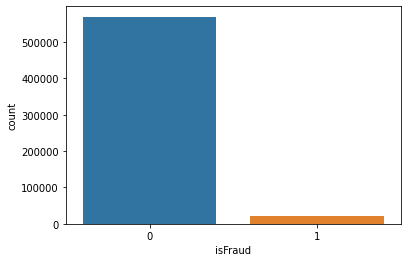

In [6]:
sns.countplot(data = objects, x = 'isFraud')

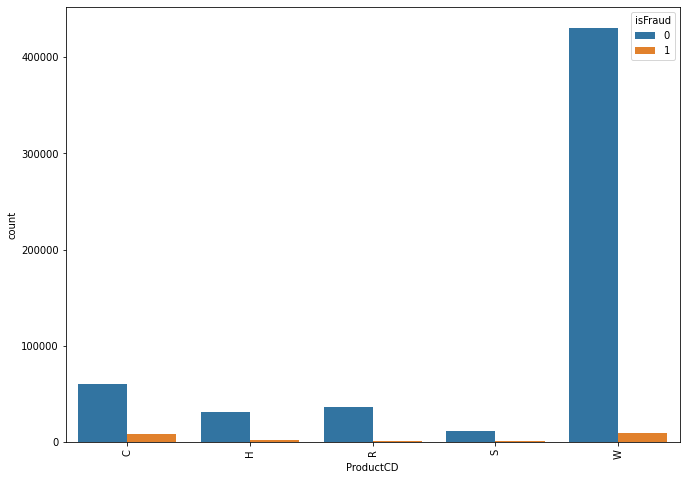

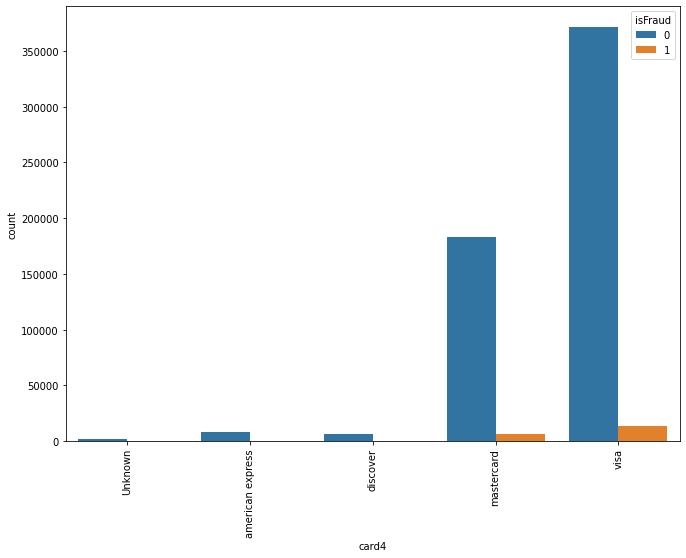

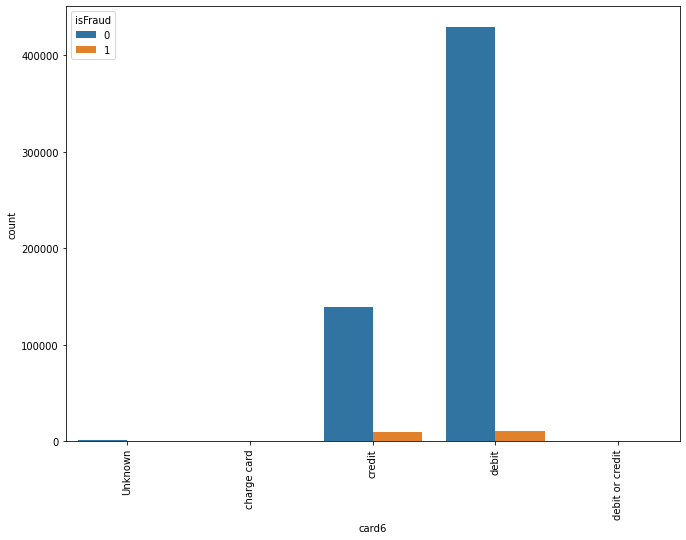

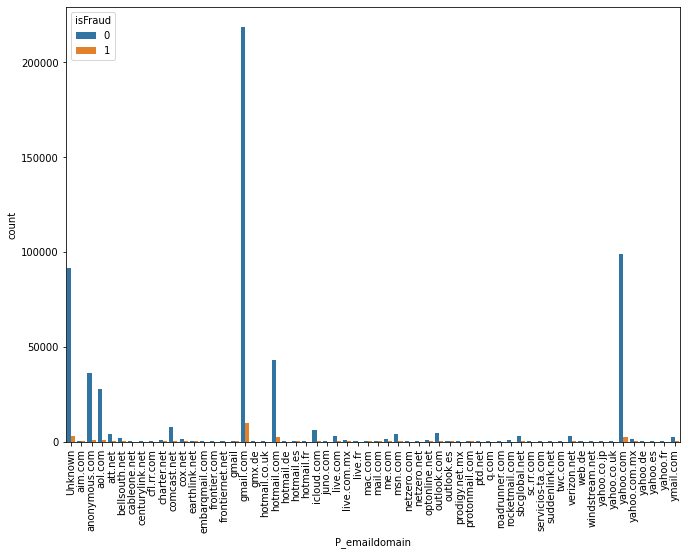

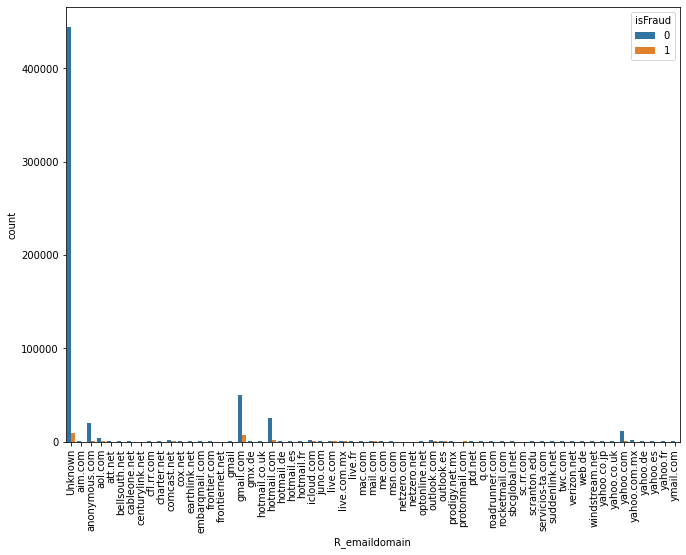

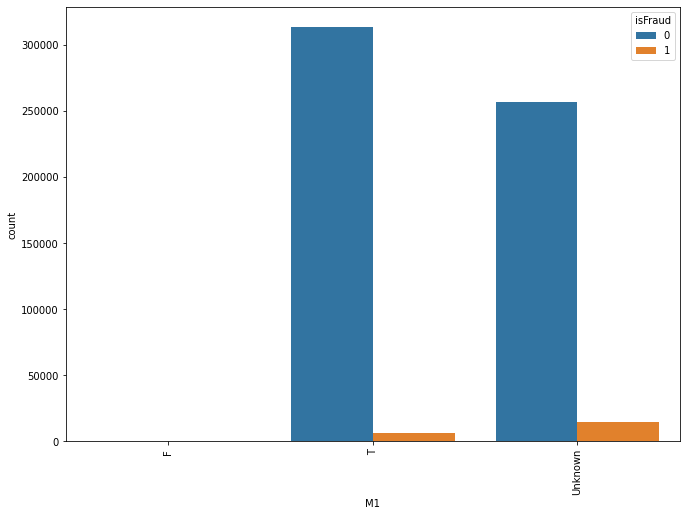

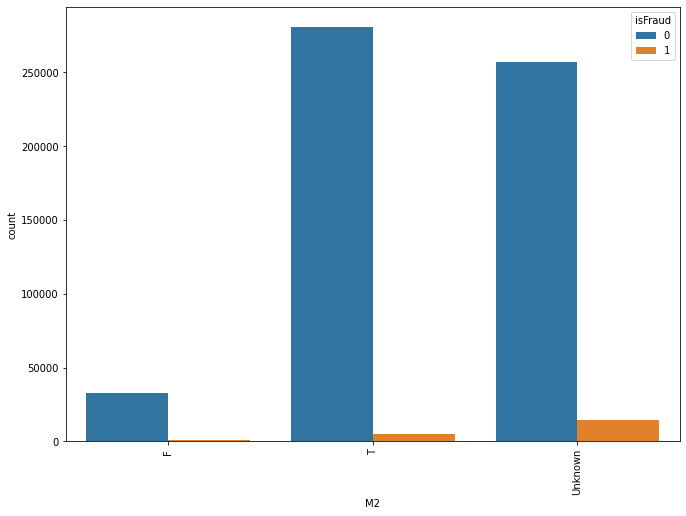

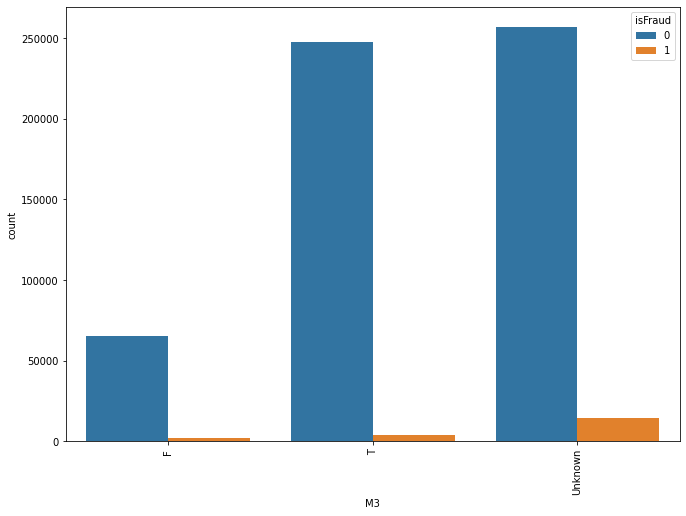

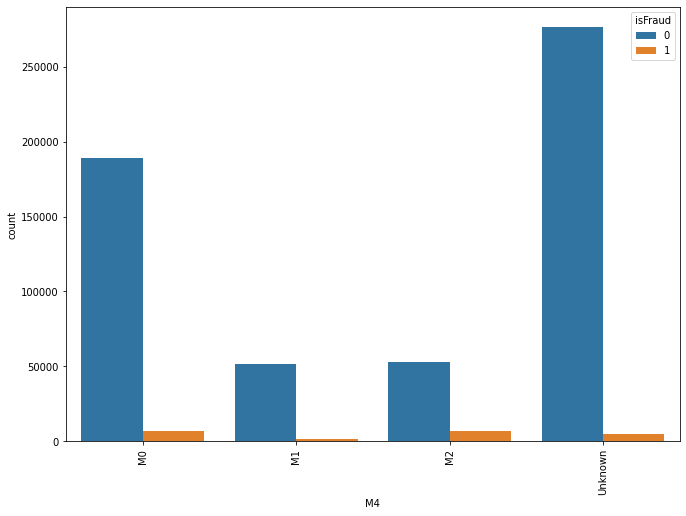

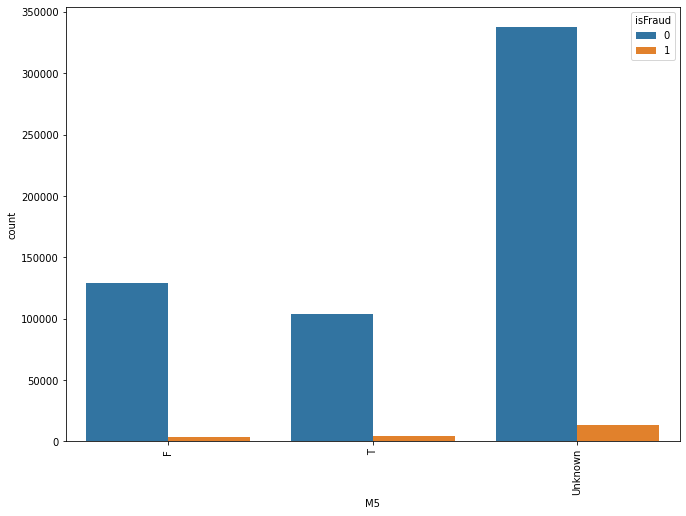

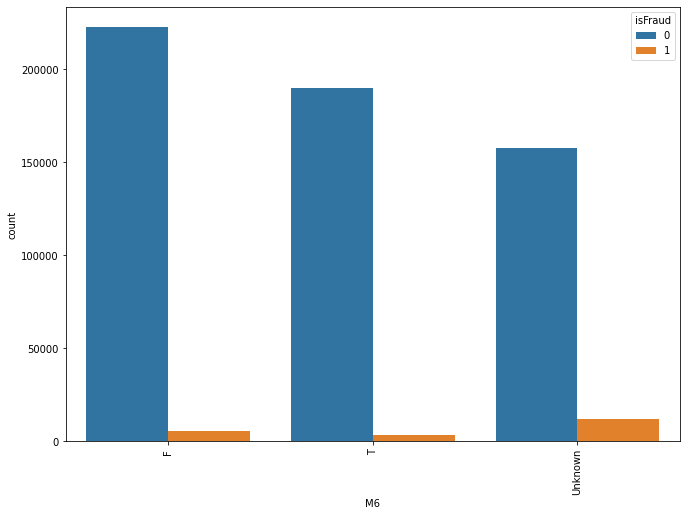

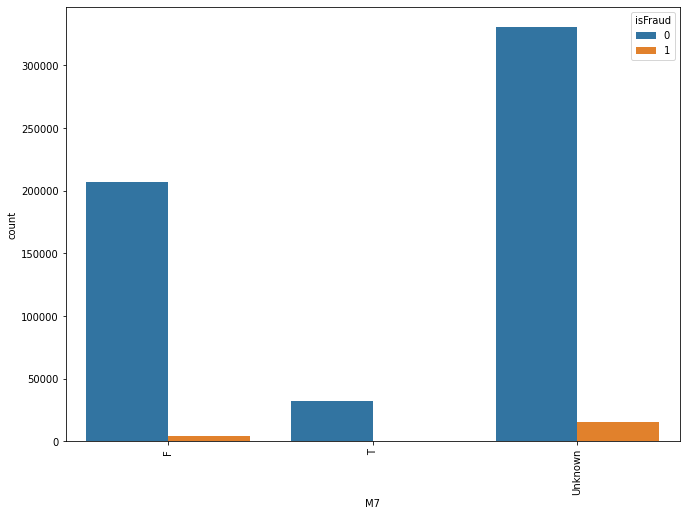

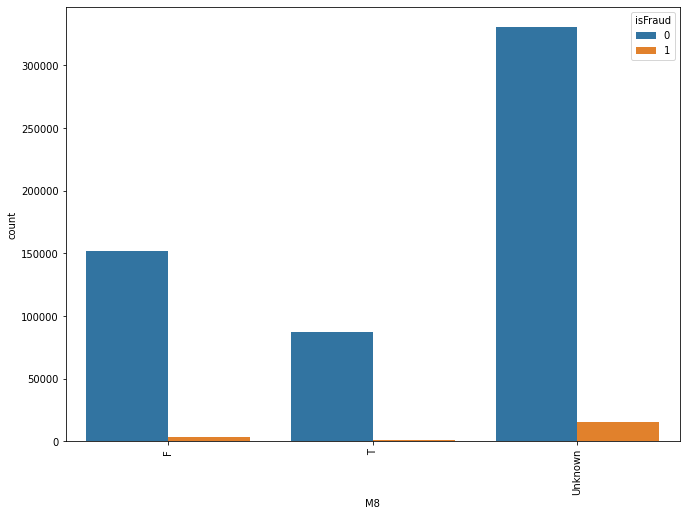

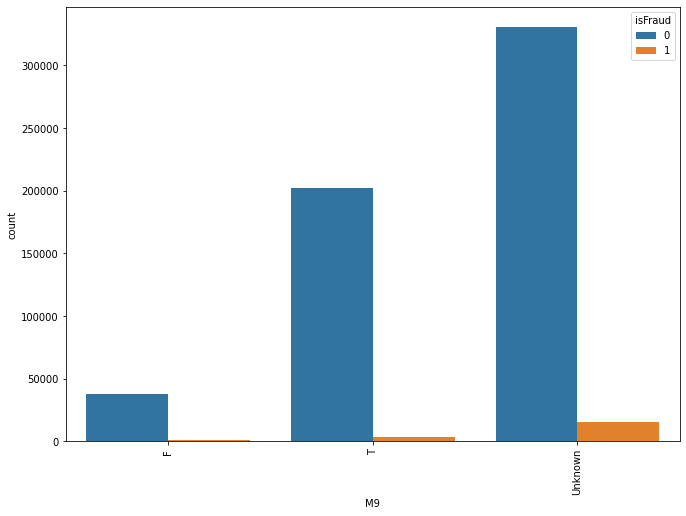

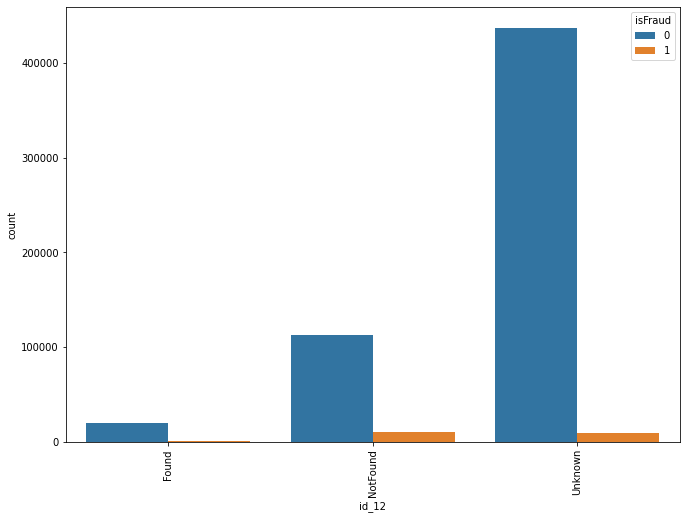

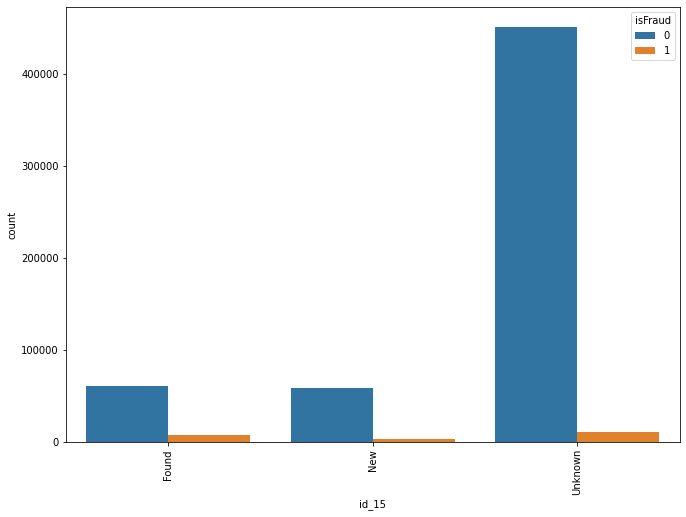

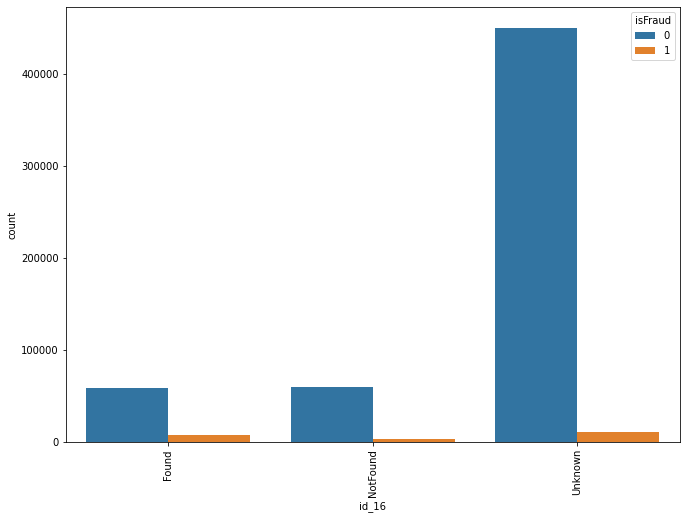

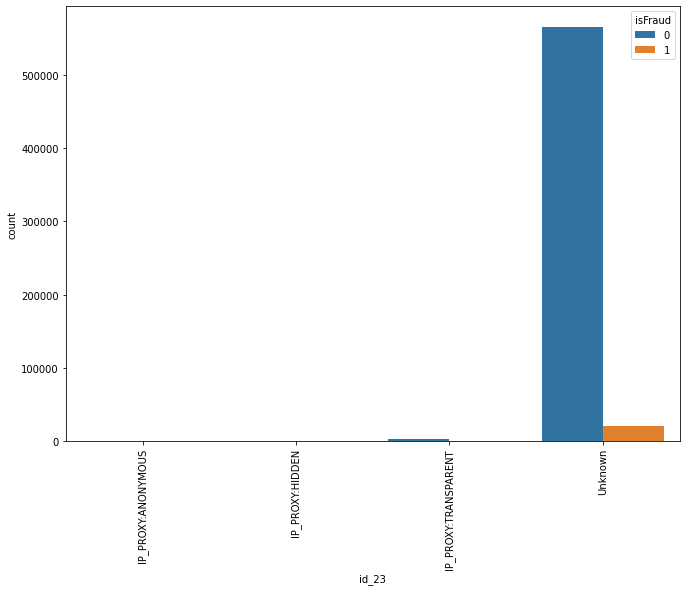

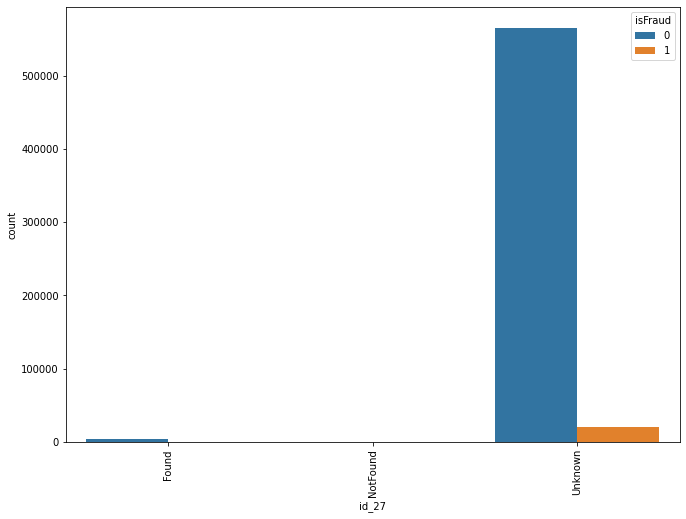

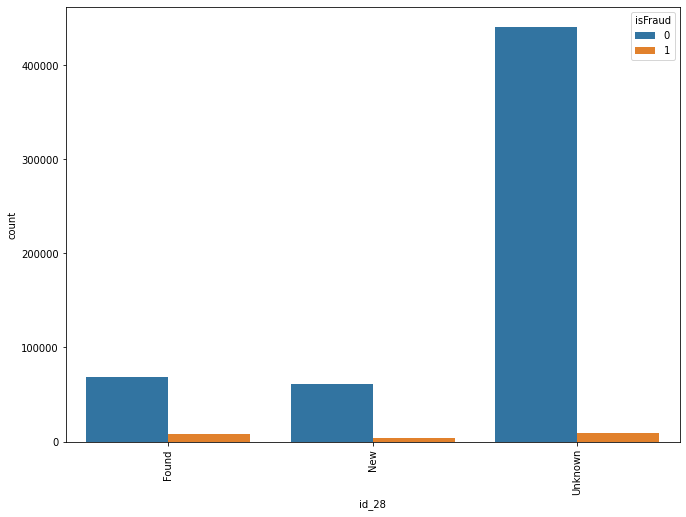

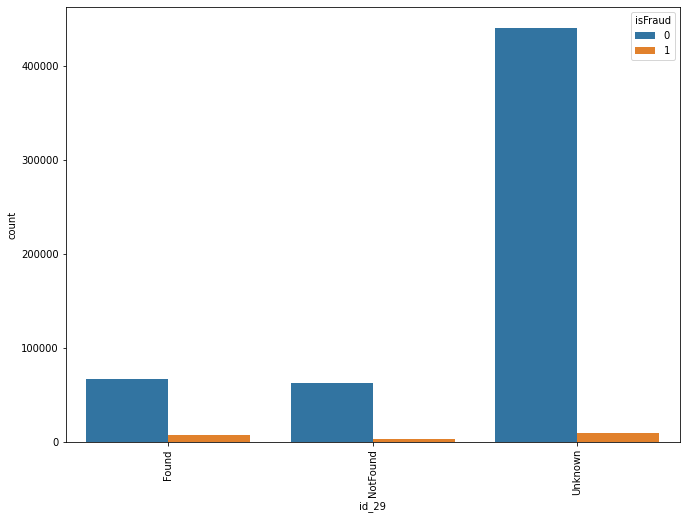

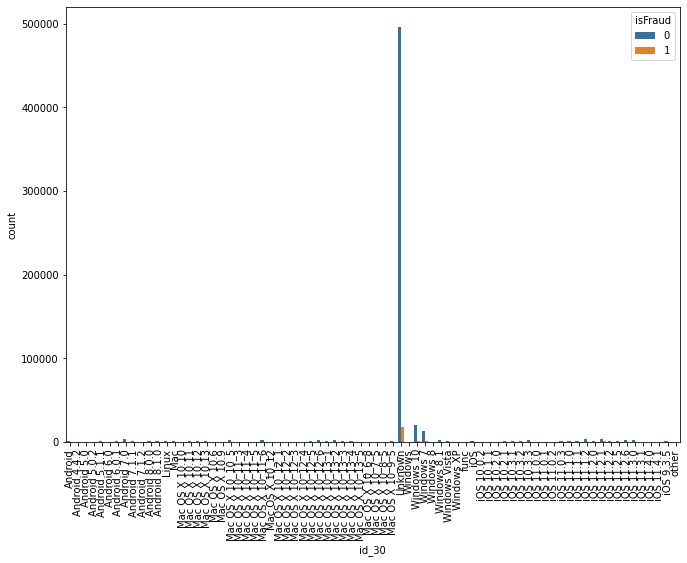

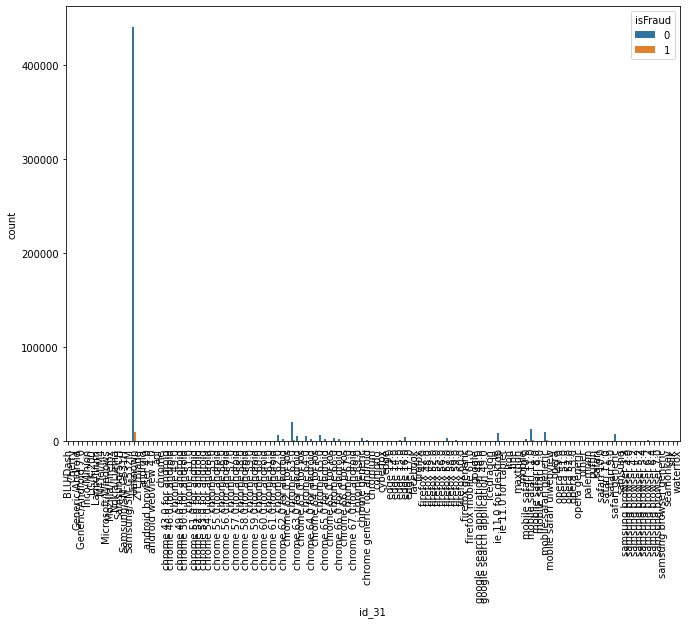

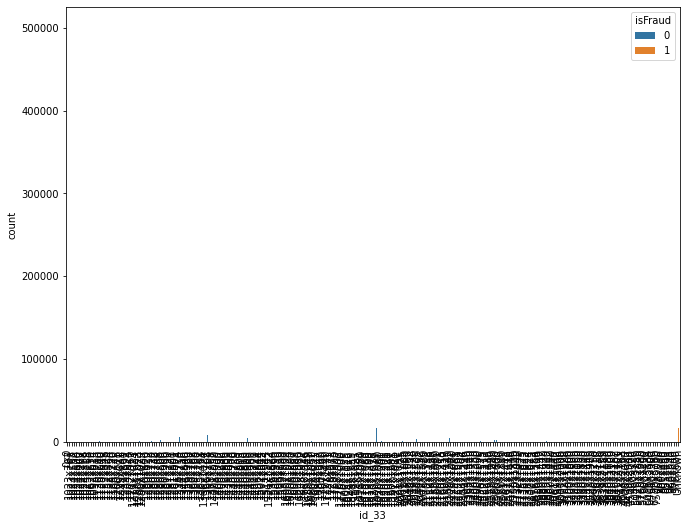

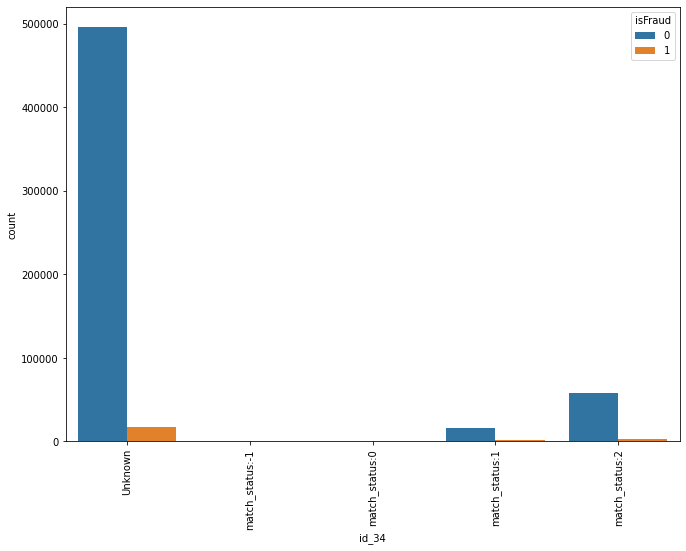

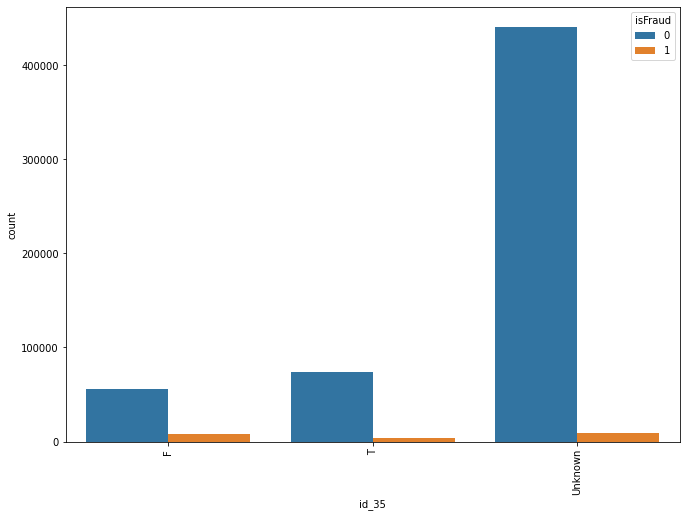

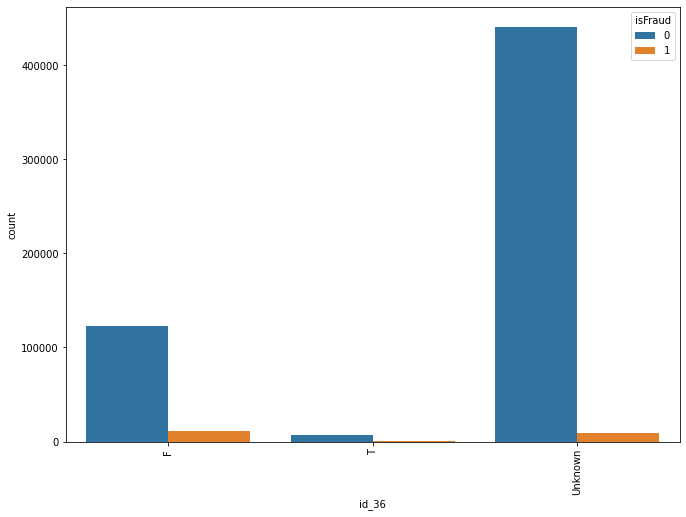

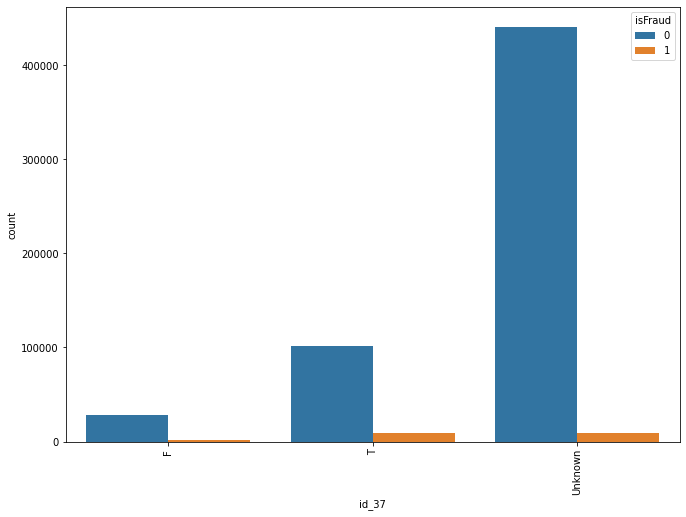

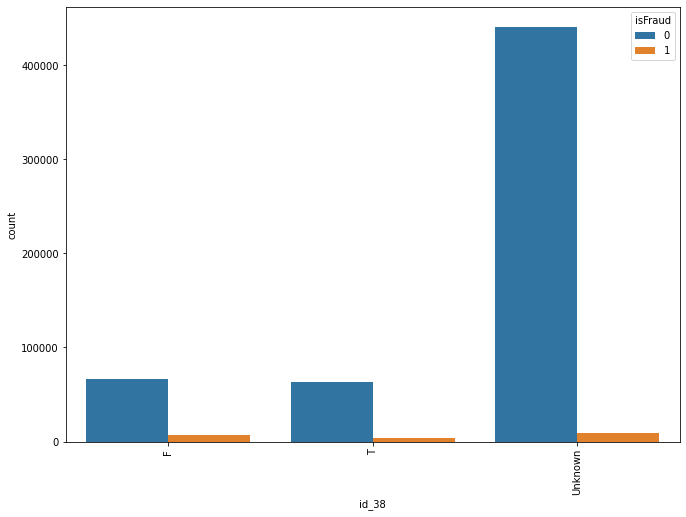

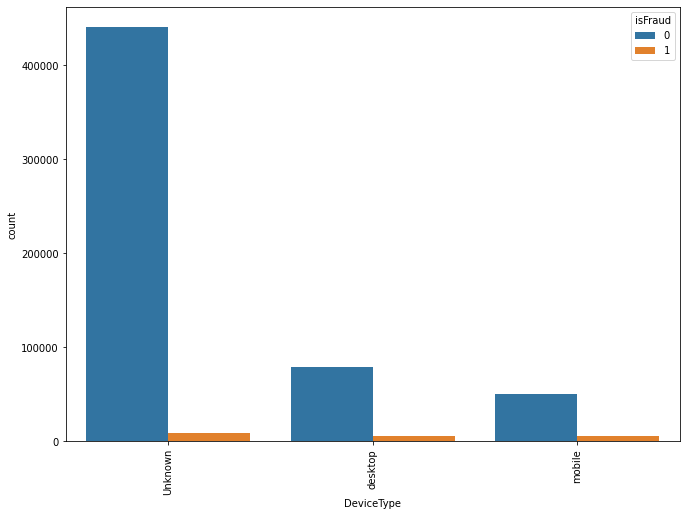

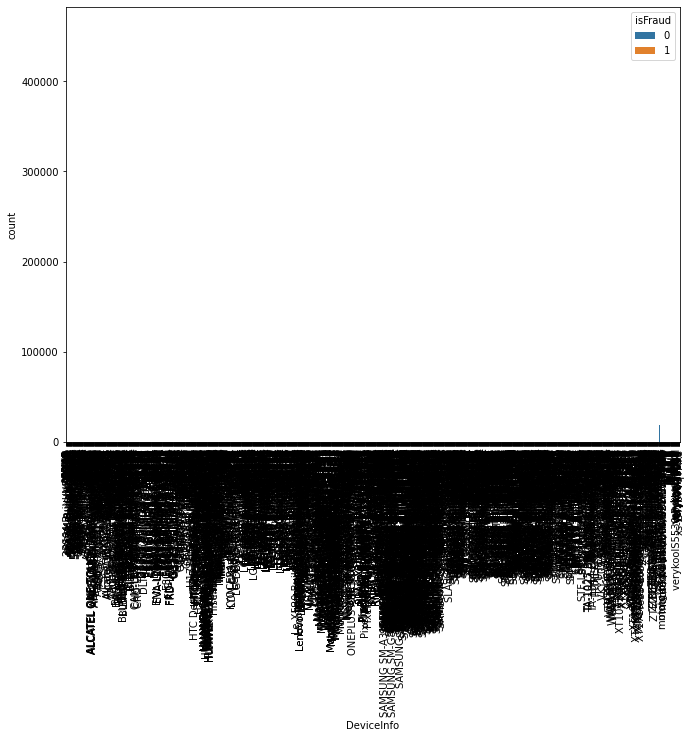

In [18]:
columns = objects.columns.to_list()[:-1]

for i, col in enumerate(columns):
    plt.figure(i, figsize=(11,8))
    sns.countplot(data=objects, x=col, hue='isFraud')
    plt.xticks(rotation=90)